# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

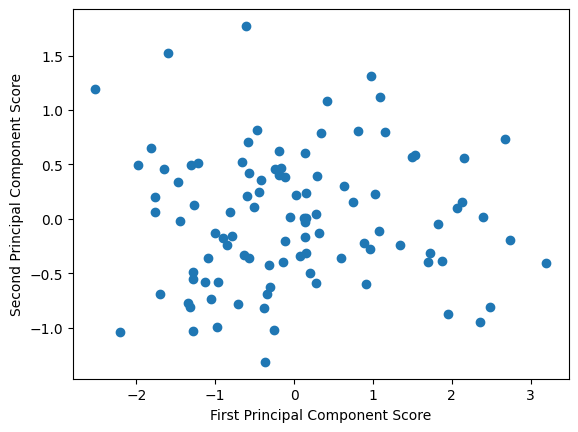

In [3]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

In [ ]:
# The three outliers in the plot in the left hand upper corner demonstrate scores which have a very low first principal component score
# and also a very high second principal component score.
# Having low first principal component score would indicate they both had very low values in series 1 and series 2 as they would be highly correlated
# The points having a very high second principal component score would indicate the points had higher and more deviation than expected in series 3 from series 1 and series 2

# Therefore series 1 and series 2 may be highly collinear. 

In [ ]:
# Some advantages of the graph used are that is simplifies the data into a 2D dimension using the first and second principal component scores
# which allows for a clear identification of outliers amongst the first and second principal components. 
# Some disadvantages are that it is hard to interpret the data points without understanding the series information
# Additionally, it doesn't compare the 3 series direcly like the pairplot does to see the direct correlations.

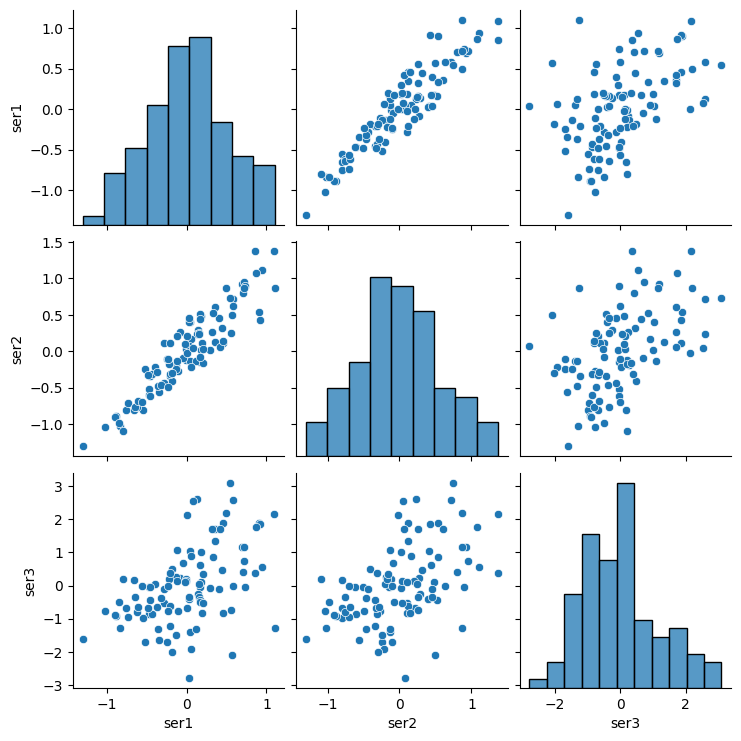

In [4]:
# Pairplot

import seaborn as sns
sns.pairplot(df)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd

diabetes_survey = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_survey.iloc[0:5]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


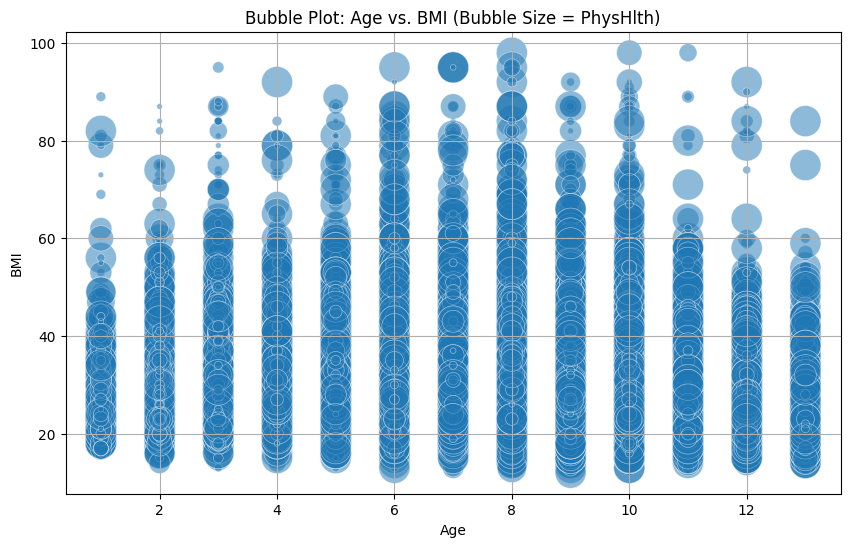

In [11]:
#Bubble Plot

df_clean = diabetes_survey[['Age', 'BMI', 'PhysHlth']].dropna()

def normalize(series, scale=500):
    return scale * (series - series.min()) / (series.max() - series.min())

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age'], df_clean['BMI'], 
            s=normalize(df_clean['PhysHlth']), 
            alpha=0.5, edgecolors='w', linewidth=0.5)

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Bubble Plot: Age vs. BMI (Bubble Size = PhysHlth)')
plt.grid(True)
plt.show()

In [ ]:
# Note the Age category is broken down into 13 separate 5 year ranges:13-level age category 1 = 18-24 ... 9 = 60-64 13 = 80 or older
# As expected there is a lot of datapoints in the dataset so the bubble plot is very hard to read with multiple overlapping bubbles
# Larger bubbles appear in specific regions, indicating individuals with higher physical health issues tend to cluster at certain age/BMI combinations.
# You might notice a trend where larger bubbles are more prevalent in older age groups or higher BMI ranges, suggesting a relationship between age/BMI and physical health limitations.

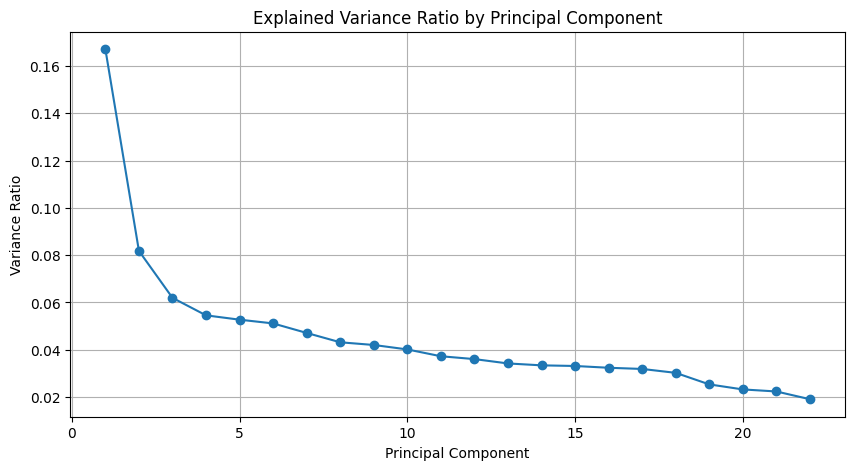

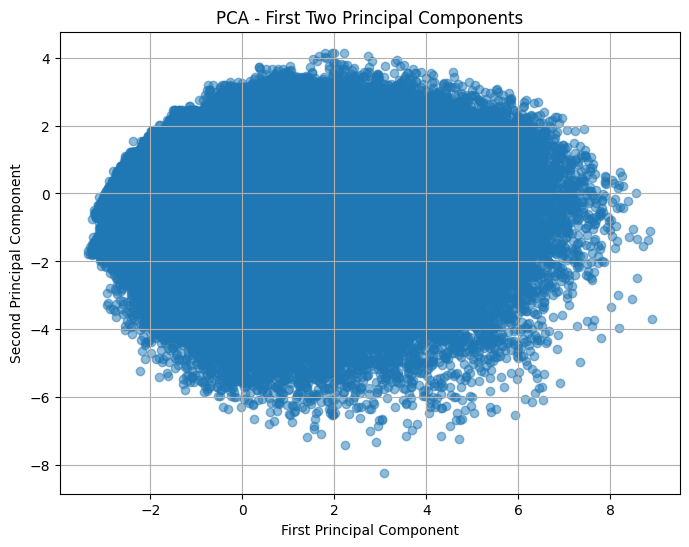

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

df_numeric = df.select_dtypes(include=['number']).dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=len(df_numeric.columns))
pca.fit(df_scaled)
pca_scores = pca.transform(df_scaled)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()

In [ ]:
# The Variance Ratio chart shows how much variance in the dataset is explained by each principal component
# You can visually identify the "elbow" — the point where adding more components yields diminishing returns
# It helps you decide how many components to keep if you're doing dimensionality reduction.

# The Scatter plot of the principal components shows how the data is spread in terms of the directions with the most variation
# It demonstrates the outliers, clusters, and strucutre of the data.
# The data set used for diabetes health trends is vast, and therefore it can be difficult to interpret the charts.
# It appears to be a pretty uniform grouping around the center of the chart.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

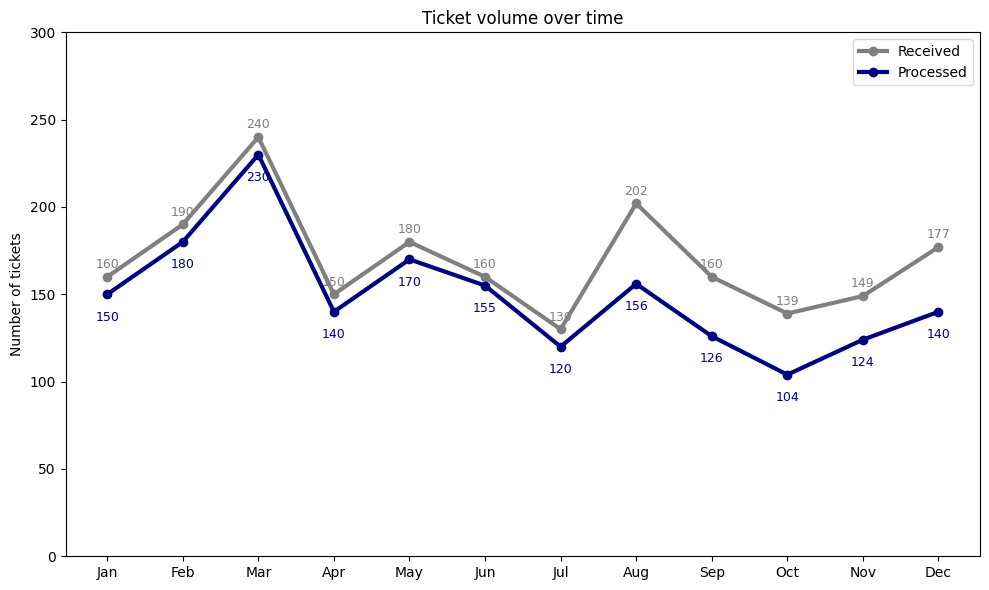

In [15]:
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']

received = [160, 190, 240, 150, 180, 160, 130, 202, 160, 139, 149, 177]
processed = [150, 180, 230, 140, 170, 155, 120, 156, 126, 104, 124, 140]

plt.figure(figsize=(10, 6))
plt.plot(months, received, label='Received', color='gray', linewidth=3, marker='o')
plt.plot(months, processed, label='Processed', color='navy', linewidth=3, marker='o')

for i, (r, p) in enumerate(zip(received, processed)):
    plt.text(months[i], r + 5, str(r), ha='center', color='gray', fontsize=9)
    plt.text(months[i], p - 15, str(p), ha='center', color='navy', fontsize=9)

plt.title('Ticket volume over time')
plt.ylabel('Number of tickets')
plt.legend()

plt.ylim(0, 300)
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()